# 3.Regression
## importing the dataset

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score

## data collection

In [39]:
df = pd.read_excel(r"C:\Users\DELL\Documents\Housing.xlsx")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## preprocessing

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [41]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [42]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})

In [43]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [44]:
X = df.drop(columns=['price'])
y = df['price']

In [45]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [46]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [47]:
scaler = MinMaxScaler()
X['area'] = scaler.fit_transform(X[['area']])

In [48]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,4,2,3,1,0,0,0,1,2,1,2
1,0.502405,4,4,4,1,0,0,0,1,3,0,2
2,0.571134,3,2,2,1,0,1,0,0,2,1,1
3,0.402062,4,2,2,1,0,1,0,1,3,1,2
4,0.396564,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,2,1,1,1,0,1,0,0,2,0,0
541,0.051546,3,1,1,0,0,0,0,0,0,0,1
542,0.135395,2,1,1,1,0,0,0,0,0,0,0
543,0.086598,3,1,1,0,0,0,0,0,0,0,2


## splitting data

In [49]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,train_size=0.8, shuffle=True, random_state=True)

In [50]:
X_train.shape

(436, 12)

In [51]:
y_test.shape

(109,)

## Linear regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [53]:
y_pred

array([6360332.81392052, 6274841.29397202, 6491465.71279754,
       5510686.58066066, 4181369.24106617, 2885523.91550027,
       2763522.47558986, 7412430.95457386, 2441833.46929014,
       4472027.70016119, 3808056.09459759, 3647311.37659293,
       4719872.45260813, 4789472.47550407, 5311401.78577501,
       7983201.03395633, 4241829.19846894, 3448263.28413121,
       6721648.44038588, 2698618.85640317, 4541088.54032719,
       5223322.05546595, 5259364.95493767, 3435900.87088659,
       5371454.25917625, 7006772.64005915, 2810208.40344604,
       7374586.00208439, 7656537.6173771 , 4414085.86734645,
       7604494.55854638, 6648321.02410436, 5009078.98031211,
       4558375.25277219, 6084943.51554083, 4615889.23150496,
       6542538.43513593, 3405449.54581257, 5012056.66858659,
       5734936.65551556, 3951160.04099086, 3278997.08792199,
       3675598.29596799, 4556073.9359985 , 6376266.62881045,
       3353995.50234441, 4759726.87102659, 2709760.27833657,
       2667485.03872721,

In [55]:
mae_linear = mean_absolute_error(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear =r2_score(y_test, y_pred)

In [57]:
print("Mean absolute error ", mae_linear)
print("Mean square error",mse_linear)
print("r2 score", r2_linear)

Mean absolute error  898629.2950371042
Mean square error 1602773742288.0056
r2 score 0.6183140939593385


## lasso and ridge regression

In [61]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [62]:
print("Mean absolute error ", mae_lasso)
print("Mean square error",mse_lasso)
print("r2 score", r2_lasso)

Mean absolute error  898628.2415530992
Mean square error 1602774510451.8452
r2 score 0.6183139110281466


In [63]:
print("Mean absolute error ", mae_ridge)
print("Mean square error",mse_ridge)
print("r2 score", r2_ridge)

Mean absolute error  899975.8401288176
Mean square error 1611491850481.2632
r2 score 0.6162379562382688


In [64]:
comparison = pd.DataFrame({
    'Model': [ 'Lasso Regression', 'Ridge Regression', 'Linear Regression'],
    'MAE': [mae_lasso, mae_ridge, mae_linear],
    'MSE': [mse_lasso, mse_ridge, mse_linear],
    'R2_SCORE' :[r2_lasso, r2_ridge, r2_linear]
   
})

pd.DataFrame(comparison)

,Model,MAE,MSE,R2_SCORE
0,Lasso Regression,898628.241553,1.602775e+12,0.618314
1,Ridge Regression,899975.840129,1.611492e+12,0.616238
2,Linear Regression,898629.295037,1.602774e+12,0.618314


## plot graph

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


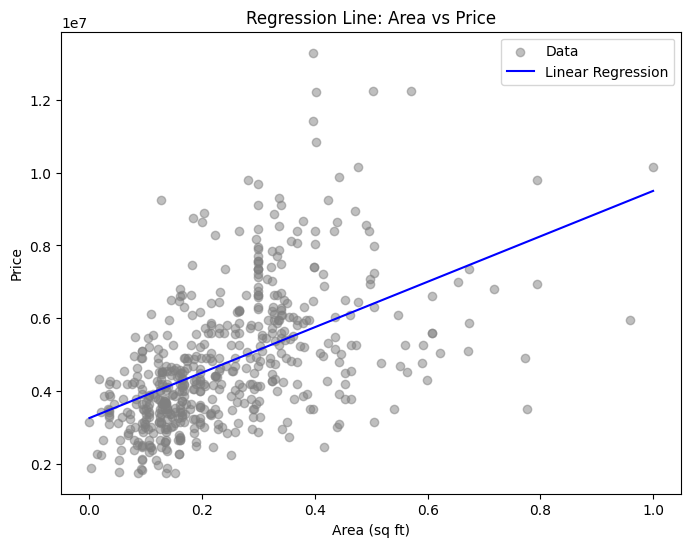

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(X["area"], y, color="gray", alpha=0.5, label="Data")

X_area = np.linspace(X["area"].min(), X["area"].max(), 100).reshape(-1,1)

lin_area = LinearRegression().fit(X_train[["area"]], y_train)
plt.plot(X_area, lin_area.predict(X_area), color="blue", label="Linear Regression")

plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Regression Line: Area vs Price")
plt.legend()
plt.show()

## regression coefficients

In [68]:
print("Linear Regression Coefficients:")
for col, coef in zip(X.columns, lr.coef_):
    print(f"{col}: {coef:.2f}")

print("\nLasso Regression Coefficients:")
for col, coef in zip(X.columns, lasso.coef_):
    print(f"{col}: {coef:.2f}")

print("\nRidge Regression Coefficients:")
for col, coef in zip(X.columns, ridge.coef_):
    print(f"{col}: {coef:.2f}")

Linear Regression Coefficients:
area: 3411607.42
bedrooms: 95769.97
bathrooms: 1039628.49
stories: 493134.02
mainroad: 431057.50
guestroom: 328097.64
basement: 491009.86
hotwaterheating: 940872.41
airconditioning: 669335.16
parking: 263763.65
prefarea: 589290.36
furnishingstatus: 198394.32

Lasso Regression Coefficients:
area: 3411562.21
bedrooms: 95770.18
bathrooms: 1039628.79
stories: 493133.40
mainroad: 431055.21
guestroom: 328095.67
basement: 491005.98
hotwaterheating: 940846.25
airconditioning: 669332.38
parking: 263766.12
prefarea: 589290.04
furnishingstatus: 198394.46

Ridge Regression Coefficients:
area: 3021352.45
bedrooms: 105072.02
bathrooms: 1044075.40
stories: 486210.62
mainroad: 457349.15
guestroom: 343876.28
basement: 472256.10
hotwaterheating: 876933.69
airconditioning: 676391.90
parking: 281957.06
prefarea: 609136.36
furnishingstatus: 202271.52
